In [1]:
import geopandas as gpd

In [2]:
shapefile_path = r"E:\TAMU\Fall 2023\Capstone\Move_IT\data\T-Mobile-selected\T_Mobile_LTE_Voice\T_Mobile_349481/T_Mobile_349481.shp"
gdf = gpd.read_file(shapefile_path)

In [3]:
gdf.head()

,DBA,TECHNOLOGY,geometry
0,T-Mobile,83,"POLYGON ((-124.38163 42.86272, -124.38163 42.8..."
1,T-Mobile,83,"POLYGON ((-124.28551 42.86338, -124.28551 42.8..."
2,T-Mobile,83,"POLYGON ((-124.36996 42.86667, -124.36996 42.8..."
3,T-Mobile,83,"POLYGON ((-124.36726 42.68865, -124.36726 42.6..."
4,T-Mobile,83,"POLYGON ((-124.20017 42.68931, -124.20017 42.6..."


In [5]:
coordinate_system = gdf.crs

In [6]:
coordinate_system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
gdf.shape

(147206, 3)

In [16]:
import geopandas as gpd
import os
from tqdm import tqdm
import pandas as pd
import zipfile

# Create an empty GeoDataFrame to store the data
all_data = gpd.GeoDataFrame()

folder_path = '/Users/snehamishra/Downloads/Capstone_Project/T_Mobile_LTE_Voice'

# Get a list of folder names (excluding ZIP and .DS_Store files)
folder_names = [f for f in os.listdir(folder_path) if not (f.endswith('.zip') or f == '.DS_Store')]

# Create a tqdm progress bar
with tqdm(total=len(folder_names), desc='Processing folders') as pbar:
    for folder_name in folder_names:
        shapefile_folder = os.path.join(folder_path, folder_name)

        # Find all .shp files within the folder
        shapefiles = [f for f in os.listdir(shapefile_folder) if f.endswith('.shp')]

        for shapefile_name in shapefiles:
            shapefile_path = os.path.join(shapefile_folder, shapefile_name)

            shapefile = gpd.read_file(shapefile_path)

            # Concatenate the data to the master GeoDataFrame
            all_data = pd.concat([all_data, shapefile], ignore_index=True)

        # Update the progress bar
        pbar.update(1)

# Check the first few rows of the resulting GeoDataFrame
print(all_data.head())


Processing folders: 100%|███████████████████████| 26/26 [08:13<00:00, 18.97s/it]

        DBA  TECHNOLOGY                                           geometry
0  T-Mobile          83  POLYGON ((-89.08054 35.02000, -89.08054 35.019...
1  T-Mobile          83  POLYGON ((-89.02394 35.07590, -89.02394 35.074...
2  T-Mobile          83  POLYGON ((-89.03113 35.01118, -89.03113 35.009...
3  T-Mobile          83  POLYGON ((-89.03293 35.00014, -89.03293 34.999...
4  T-Mobile          83  POLYGON ((-89.03293 34.94861, -89.03293 34.947...


In [17]:
all_data.shape

(2640790, 3)

In [59]:
chopped_data = all_data.iloc[:150000, :]

In [60]:
# Specify the path where you want to save the CSV file
csv_file_path = '/Users/snehamishra/Downloads/Capstone_Project/new_data_test.csv'  # Replace with your desired file path

# Save the GeoDataFrame as a CSV file
chopped_data.to_csv(csv_file_path, index=False)

# Confirm that the CSV file has been saved
print(f"CSV file saved to {csv_file_path}")


CSV file saved to /Users/snehamishra/Downloads/Capstone_Project/new_data_test.csv


In [61]:
first_5_geometry = all_data['geometry'].head(1)

In [62]:
first_5_geometry

0    POLYGON ((-89.08054 35.02000, -89.08054 35.019...
Name: geometry, dtype: geometry

In [63]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = '/Users/snehamishra/Downloads/Capstone_Project/new_data_test.csv'  # Replace with your file path

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to confirm it was read successfully
print(df.head())


        DBA  TECHNOLOGY                                           geometry
0  T-Mobile          83  POLYGON ((-89.080537 35.020004, -89.080537 35....
1  T-Mobile          83  POLYGON ((-89.023943 35.075897, -89.023943 35....
2  T-Mobile          83  POLYGON ((-89.031129 35.011176, -89.031129 35....
3  T-Mobile          83  POLYGON ((-89.032926 35.000139, -89.032926 34....
4  T-Mobile          83  POLYGON ((-89.032926 34.948613, -89.032926 34....


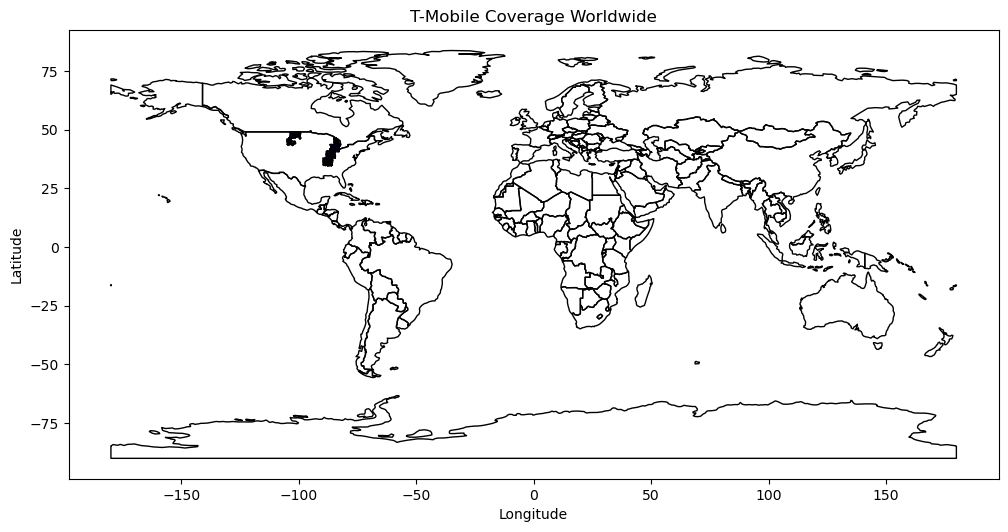

In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read a world shapefile for the basemap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Read your GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))

# Create a world map plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the world basemap
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the T-Mobile coverage polygons on top of the world map
gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

plt.title('T-Mobile Coverage Worldwide')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the map
plt.show()


In [71]:
import folium
import geopandas as gpd
import json

# Read the geospatial data into a GeoDataFrame
gdf = gpd.read_file('/Users/snehamishra/Downloads/Capstone_Project/new_data_test.csv')

# Create a Folium map centered around the region of interest
m = folium.Map(location=[gdf['geometry'].centroid.y.mean(), gdf['geometry'].centroid.x.mean()], zoom_start=10)

# Function to convert multipolygons to valid GeoJSON format
def convert_to_geojson(geometry):
    if geometry.geom_type == 'Polygon':
        return json.loads(geometry.to_json())
    elif geometry.geom_type == 'MultiPolygon':
        multipolygon = json.loads(geometry.to_json())
        valid_geojson = {
            "type": "MultiPolygon",
            "coordinates": [feature["coordinates"][0] for feature in multipolygon["features"]]
        }
        return valid_geojson
    else:
        return None

# Add GeoJSON features to the map
for idx, row in gdf.iterrows():
    geometry_json = convert_to_geojson(row['geometry'])
    if geometry_json:
        feature = folium.Feature(
            geometry=geometry_json,
            properties={'Name': row['Name']}  # Replace 'Name' with your column name if needed
        )
        folium.GeoJson(feature, name=row['Name']).add_to(m)

# Add a layer control to toggle layers
folium.LayerControl().add_to(m)

# Display the map
m.save('t_mobile_coverage_map.html')  # Save the map to an HTML 

ValueError: GeoDataFrame does not support multiple columns using the geometry column name 'geometry'.

In [74]:
import geopandas as gpd
import geodatasets
import folium
import matplotlib.pyplot as plt

In [78]:
df = gpd.read_file('/Users/snehamishra/Downloads/Capstone_Project/data_test_Tmobile_voice.csv', ignore_geometry=True)

In [79]:
df['geometry'] = gpd.GeoSeries.from_wkt(df['geometry'])